In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

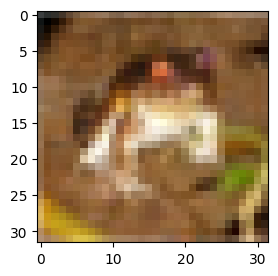

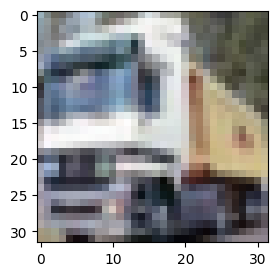

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
plt.show()

plt.figure(figsize=(3,3))
plt.imshow(X_train[1])
plt.show()

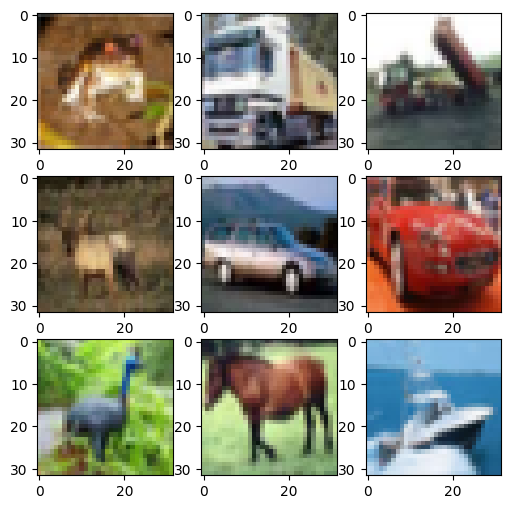

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(6,6))
axs[0,0].imshow(X_train[0])
axs[0,1].imshow(X_train[1])
axs[0,2].imshow(X_train[2])
axs[1,0].imshow(X_train[3])
axs[1,1].imshow(X_train[4])
axs[1,2].imshow(X_train[5])
axs[2,0].imshow(X_train[6])
axs[2,1].imshow(X_train[7])
axs[2,2].imshow(X_train[8])
plt.show()

In [ ]:
# X_train = X_train[:24000]
# y_train = y_train[:24000]
# X_test = X_test[:8000]
# y_test = y_test[:8000]

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3778 - loss: 1.6921
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6011 - loss: 1.1341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6527 - loss: 0.9967
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.6865 - loss: 0.9008
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7081 - loss: 0.8426
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7297 - loss: 0.7750
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7485 - loss: 0.7248
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7621 - loss: 0.6806
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7750 - loss: 0.6435
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7911 - loss: 0.5993


In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 3s - 10ms/step - accuracy: 0.6828 - loss: 0.9574


[0.9574436545372009, 0.6827999949455261]

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
print('Accuracy:', accuracy_score(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))

Accuracy: 0.6828
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.83      0.82      0.83      1000
           2       0.44      0.75      0.56      1000
           3       0.54      0.45      0.49      1000
           4       0.71      0.53      0.60      1000
           5       0.55      0.58      0.57      1000
           6       0.79      0.74      0.77      1000
           7       0.84      0.67      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000

